In [1]:
import tensorflow_core as tf
import numpy as np
import matplotlib.pyplot as plt

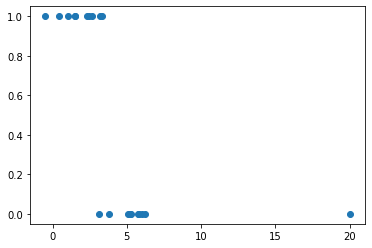

In [15]:
x_label0 = np.append(np.random.normal(5, 1, 9), 20)
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)

# just normal python array. not numpy
temp = [0.] * len(x_label0) + [1.] * len(x_label1)

labels = np.array(temp)

plt.scatter(xs, labels)

0 9.335569
100 3.3806725
200 3.2587237
300 3.25619
400 3.2561374
500 3.2561364
600 3.2561362
700 3.2561364
800 3.2561364
900 3.2561364


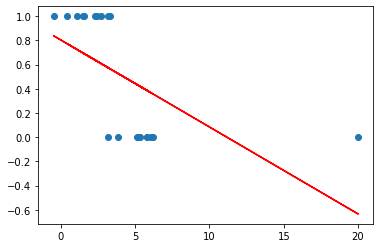

In [16]:
learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)


def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)), tf.multiply(w[0], tf.pow(X, 0)))


w = tf.Variable([0.0, 0.0], name="parameters")
y_model = model(X, w)

cost = tf.reduce_sum(tf.square(Y - y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(train_op, feed_dict={X: xs, Y: labels})
    current_cost = sess.run(cost, feed_dict={X: xs, Y: labels})

    if epoch % 100 == 0:
        print(epoch, current_cost)

w_val = sess.run(w)
sess.close()

plt.scatter(xs, labels)
plt.plot(xs, xs * w_val[1] + w_val[0], 'r')
plt.show()
